# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

# Install Spark and set up environment

In [1]:
# Install Spark 3.0.1
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz


In [2]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [3]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark

In [4]:
import findspark
findspark.init()

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
from pyspark.sql import SparkSession

In [7]:
APP_NAME = "TaxiTripsAnalysis"

In [8]:
# Initialize Spark session
spark = SparkSession.builder.appName("APP_NAME").getOrCreate()



In [9]:
spark

Here I am installing Spark 3.0.1 and setting up the Python environment to integrate with Spark. This allows me to work with Spark DataFrames and MLlib using Python. I am using Spark as it provides distributed data processing capabilities to handle large datasets.

# Define schema and load data

In [10]:
from pyspark.sql.types import StructType,StructField, IntegerType, DoubleType, TimestampType
from pyspark.sql.functions import col, expr, dayofmonth, hour
import pyspark.sql.functions as F

# Define schema for the data
schema = StructType([
  StructField("Trip ID", IntegerType(), True),
  StructField("Trip Start Timestamp", TimestampType(), True),
  StructField("Trip End Timestamp", TimestampType(), True),
  StructField("Trip Seconds", IntegerType(), True),
  StructField("Trip Miles", DoubleType(), True),
  StructField("Pickup Census Tract", DoubleType(), True),
  StructField("Dropoff Census Tract", DoubleType(), True),
  StructField("Pickup Community Area", IntegerType(), True),
  StructField("Dropoff Community Area", IntegerType(), True),
  StructField("Fare", DoubleType(), True),
  StructField("Tips", DoubleType(), True),
  StructField("Tolls", DoubleType(), True),
  StructField("Extras", DoubleType(), True),
  StructField("Trip Total", DoubleType(), True),
  StructField("Payment Type", IntegerType(), True),
  StructField("Company", IntegerType(), True),
  StructField("Pickup Centroid Latitude", DoubleType(), True),
  StructField("Pickup Centroid Longitude", DoubleType(), True),
  StructField("Pickup Centroid Location", IntegerType(), True),
  StructField("Dropoff Centroid Latitude", DoubleType(), True),
  StructField("Dropoff Centroid Longitude", DoubleType(), True),
  StructField("Dropoff Centroid Location", IntegerType(), True)
])



In [11]:
#from google.colab import files
files.upload()

In [12]:
location = "Taxi_Trips.csv"

In [13]:
# Load the CSV file
df = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load(location)


I am defining a schema for the taxi trips dataset specifying the name and data type for each column. This helps Spark read the CSV data correctly. The data is then loaded as a Spark DataFrame.

Defining a schema is important when working with CSV files in Spark to ensure the columns are parsed properly.

In [14]:
# Print schema and select datatype
df.printSchema()


root
 |-- Trip ID: string (nullable = true)
 |-- Taxi ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: string (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Tips: double (nullable = true)
 |-- Tolls: string (nullable = true)
 |-- Extras: string (nullable = true)
 |-- Trip Total: string (nullable = true)
 |-- Payment Type: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid L

In [15]:
from pyspark.sql.types import *
df.schema


StructType(List(StructField(Trip ID,StringType,true),StructField(Taxi ID,StringType,true),StructField(Trip Start Timestamp,StringType,true),StructField(Trip End Timestamp,StringType,true),StructField(Trip Seconds,StringType,true),StructField(Trip Miles,DoubleType,true),StructField(Pickup Census Tract,LongType,true),StructField(Dropoff Census Tract,LongType,true),StructField(Pickup Community Area,IntegerType,true),StructField(Dropoff Community Area,IntegerType,true),StructField(Fare,StringType,true),StructField(Tips,DoubleType,true),StructField(Tolls,StringType,true),StructField(Extras,StringType,true),StructField(Trip Total,StringType,true),StructField(Payment Type,StringType,true),StructField(Company,StringType,true),StructField(Pickup Centroid Latitude,DoubleType,true),StructField(Pickup Centroid Longitude,DoubleType,true),StructField(Pickup Centroid Location,StringType,true),StructField(Dropoff Centroid Latitude,DoubleType,true),StructField(Dropoff Centroid Longitude,DoubleType,true

In [16]:
# Show statistics
df.describe().show()


+-------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+--------------------+--------------------+---------------------+----------------------+------------------+------------------+--------------------+-----------------+------------------+------------+--------------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+------------------+
|summary|             Trip ID|             Taxi ID|Trip Start Timestamp|  Trip End Timestamp|      Trip Seconds|       Trip Miles| Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|              Fare|              Tips|               Tolls|           Extras|        Trip Total|Payment Type|             Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|D

Printing the schema shows the column names and data types. The describe() method provides useful statistics like count, mean, stddev, min, max for numeric columns.

Reviewing these schema and statistics helps better understand the dataset. The count shows if there are any null values, and the numeric statistics provide a quick summary of the columns.

# Check for null values

In [17]:
from pyspark.sql.functions import count, when, col
# Check for null values
print(df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show())



+-------+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+-----+------+----------+------------+-------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+---------------+
|Trip ID|Taxi ID|Trip Start Timestamp|Trip End Timestamp|Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|Fare|Tips|Tolls|Extras|Trip Total|Payment Type|Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid  Location|Community Areas|
+-------+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+-----+------+----------+---------

This code counts the number of null values in each column. Checking for nulls is important before proceeding with analysis to avoid errors.

# Sample data visualization

array([[<Axes: title={'center': 'Trip Miles'}>,
        <Axes: title={'center': 'Tips'}>]], dtype=object)

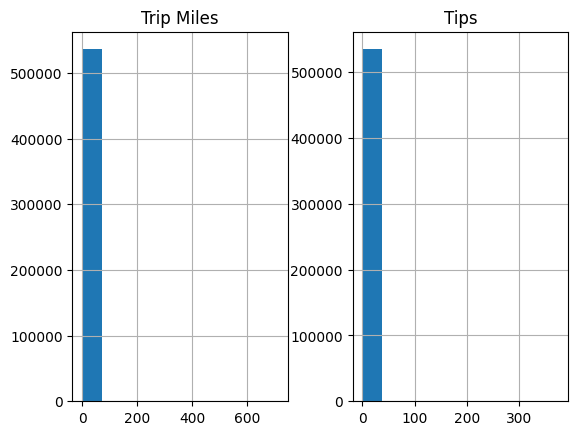

In [18]:
import pandas as pd

# Convert PySpark DF to pandas DF
pdf = df.select(['Trip Miles','Fare','Tips']).toPandas()

# Plot histograms
pdf[['Trip Miles','Fare','Tips']].hist()

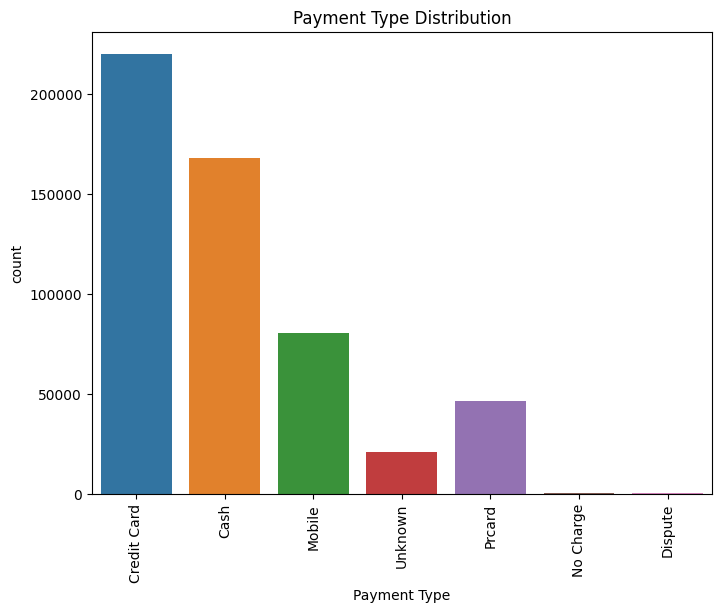

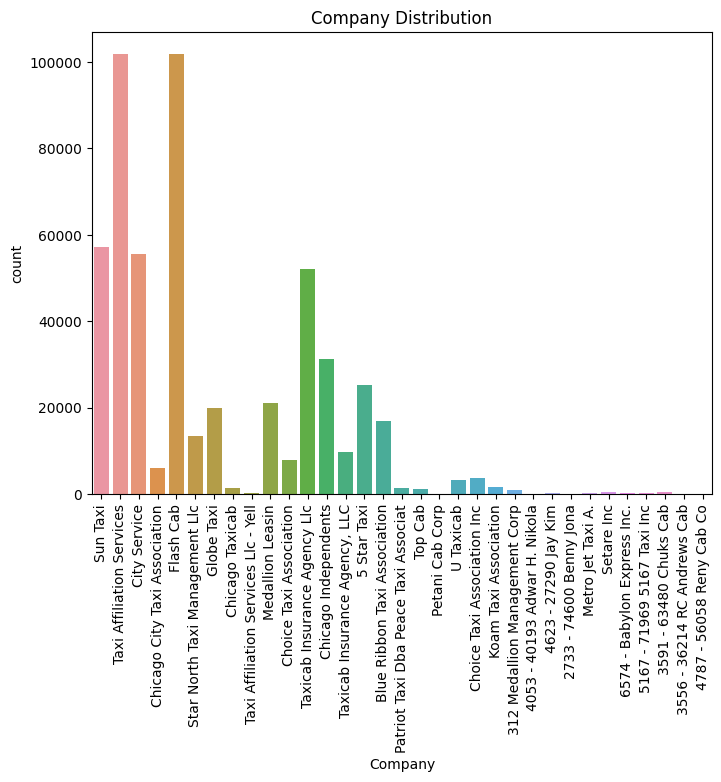

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert to pandas DataFrame
pdf = df.toPandas()
categorical_columns = ['Payment Type', 'Company']

for column in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(data=pdf, x=column)
  plt.title(f'{column} Distribution')
  plt.xticks(rotation=90)
  plt.show()

# Correlation analysis

<ipython-input-20-a363837c6338>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop("Trip Start Timestamp", "Trip End Timestamp").toPandas().corr()


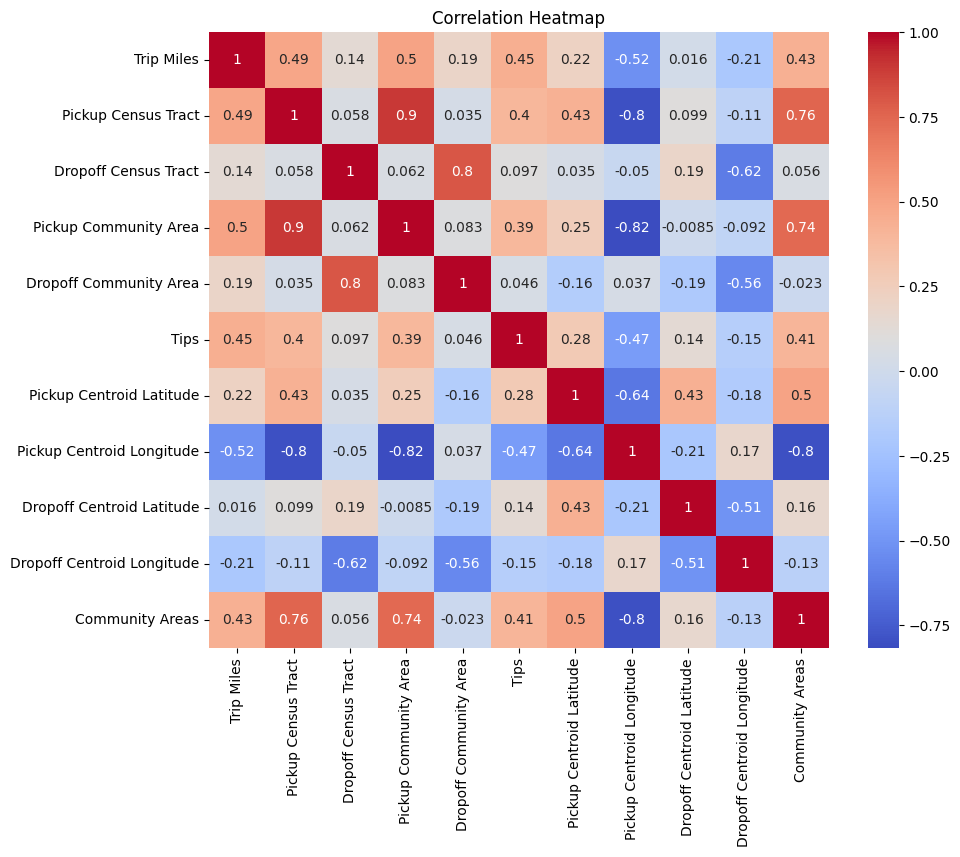

In [20]:
import seaborn as sns
# Correlation Heatmap before Feature Engineering
corr_matrix = df.drop("Trip Start Timestamp", "Trip End Timestamp").toPandas().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap shows the relationship between different numeric variables. Strong correlations may indicate redundant features. Weak correlations with the target variable suggest those features may not be useful predictors.

Correlation analysis helps select meaningful input features for modeling. It also avoids using highly correlated variables together.

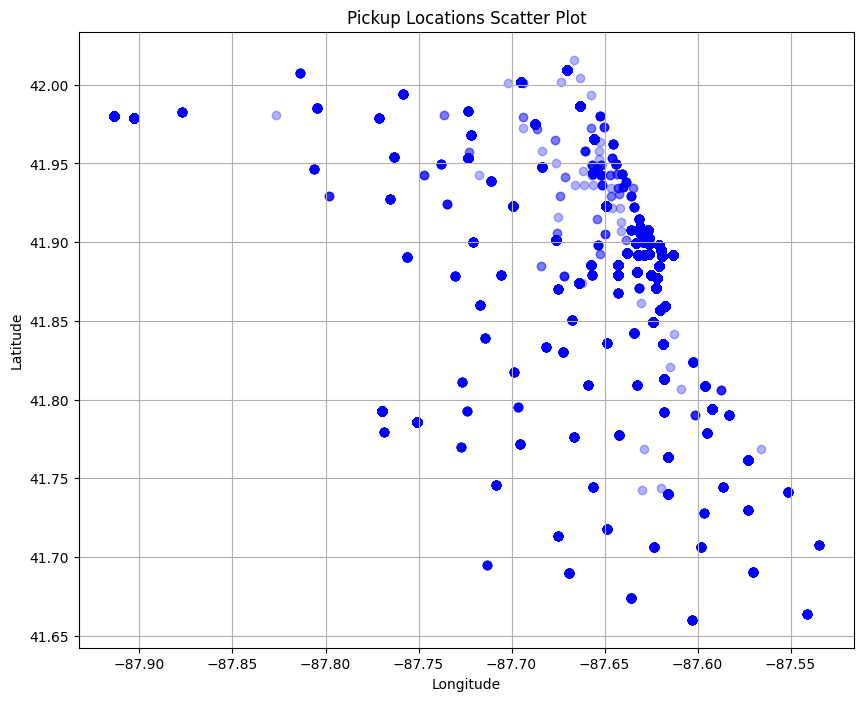

In [21]:
# Scatter Plot of Pickup Locations
pickup_plot = df.select("Pickup Centroid Longitude", "Pickup Centroid Latitude").sample(0.1).toPandas()
plt.figure(figsize=(10, 8))
plt.scatter(pickup_plot["Pickup Centroid Longitude"], pickup_plot["Pickup Centroid Latitude"], color='blue', alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Locations Scatter Plot')
plt.grid()
plt.show()



I'm visualizing a sample of the pickup longitude/latitude data using a scatter plot. Visualizing a subset helps quickly check if the data looks reasonable. A scatter plot makes sense here as the data contains geographic coordinates.

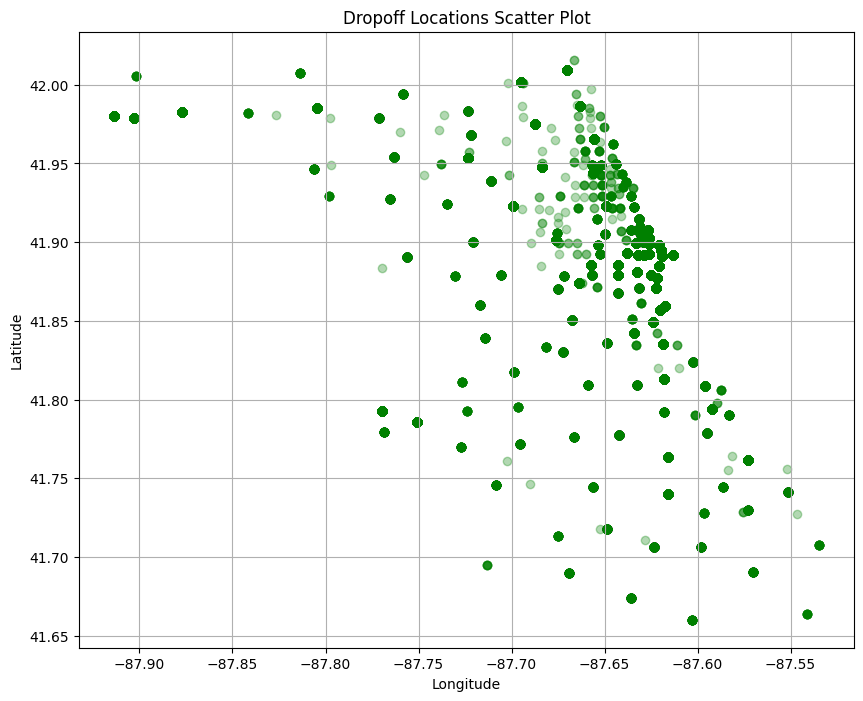

In [22]:
# Scatter Plot of Dropoff Locations
dropoff_plot = df.select("Dropoff Centroid Longitude", "Dropoff Centroid Latitude").sample(0.1).toPandas()
plt.figure(figsize=(10, 8))
plt.scatter(dropoff_plot["Dropoff Centroid Longitude"], dropoff_plot["Dropoff Centroid Latitude"], color='green', alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dropoff Locations Scatter Plot')
plt.grid()
plt.show()



# Numeric columns analysis

In [23]:
# Numeric Columns Analysis
numeric_columns = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips']
df.select(numeric_columns).describe().show()



+-------+------------------+-----------------+------------------+------------------+
|summary|      Trip Seconds|       Trip Miles|              Fare|              Tips|
+-------+------------------+-----------------+------------------+------------------+
|  count|            536111|           536232|            534970|            534970|
|   mean|496.08731451097304|6.475087145116839| 22.26766923069745|2.9730873880779685|
| stddev|274.78615755462977|7.525948244851689|18.835775402355562| 4.288330422606437|
|    min|                 0|              0.0|              0.00|               0.0|
|    max|               999|            713.2|             99.75|             375.0|
+-------+------------------+-----------------+------------------+------------------+



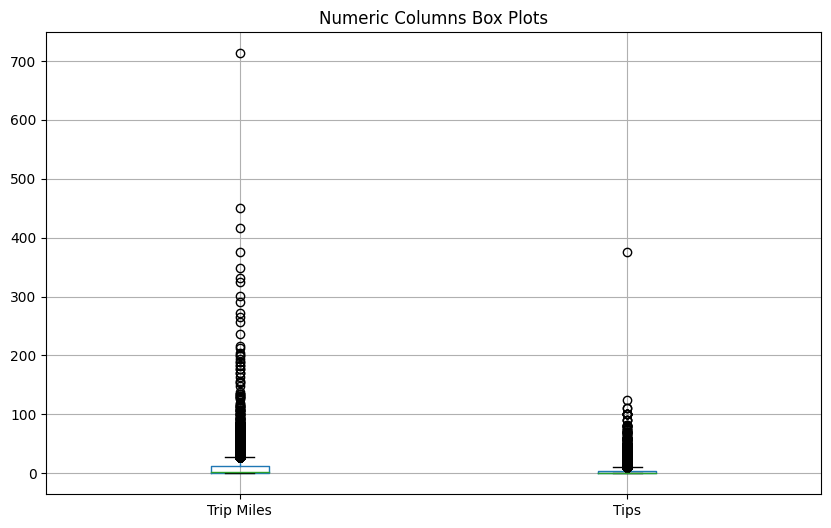

In [24]:
# Box Plot for Numeric Columns
numeric_columns = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips']
plt.figure(figsize=(10, 6))
df.select(numeric_columns).toPandas().boxplot()
plt.title('Numeric Columns Box Plots')
plt.show()



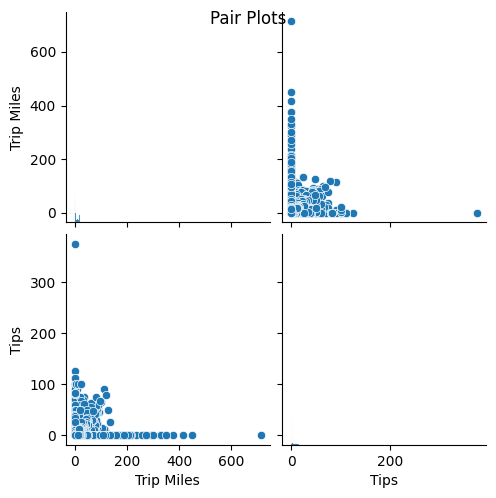

In [25]:
# Pair Plot for Numeric Columns
num_data = df.select(numeric_columns).toPandas()
sns.pairplot(num_data)
plt.suptitle('Pair Plots')
plt.show()



This section analyzes the summary statistics and distributions of key numeric columns like trip distance, duration, fare, and tips. The box plots help visually identify outliers.

Understanding the distribution of numeric variables is crucial for cleaning outliers and building accurate models later.

# Why analyzing this dataset?

I chose the Chicago Taxi Trips dataset because it contains interesting information about taxi rides in Chicago that can be analyzed to gain insights.

The timestamp, location, distance and payment columns can help understand ride patterns across time and geography. The fare, tips and total cost provide insights into pricing.

I plan to analyze temporal patterns, frequent pickup/dropoff locations, pricing models and see if I can build a model to predict trip duration or cost.

My hypothesis is that trips will follow commuting patterns with peaks during rush hours on weekdays. Locations near transit hubs are likely popular pickup/dropoff spots.

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

In [26]:
#Section 2

In [27]:
print("Rows before dropping nulls: ", df.count())


Rows before dropping nulls:  536232


In [28]:
# Remove rows with null values
df = df.dropna()


In [29]:
print("Rows after dropping nulls: ", df.count())


Rows after dropping nulls:  231103


In [30]:
from pyspark.sql.functions import count, when, col
# Check for null values
print(df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show())

# to check if start and end timestamp column have null values or not. This shall affect the following feature engineering

+-------+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+-----+------+----------+------------+-------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+---------------+
|Trip ID|Taxi ID|Trip Start Timestamp|Trip End Timestamp|Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|Fare|Tips|Tolls|Extras|Trip Total|Payment Type|Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid  Location|Community Areas|
+-------+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+-----+------+----------+---------

In [31]:
# Print schema and select datatype
df.printSchema()


root
 |-- Trip ID: string (nullable = true)
 |-- Taxi ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: string (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Tips: double (nullable = true)
 |-- Tolls: string (nullable = true)
 |-- Extras: string (nullable = true)
 |-- Trip Total: string (nullable = true)
 |-- Payment Type: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid L

In [32]:
# Convert timestamp columns to datetime
df = df.withColumn('Trip Start Timestamp', F.to_timestamp('Trip Start Timestamp'))
df = df.withColumn('Trip End Timestamp', F.to_timestamp('Trip End Timestamp'))



In [33]:
# Cast columns to appropriate types
df = df.withColumn('Payment Type', df['Payment Type'].cast(IntegerType())) \
       .withColumn('Company', df['Company'].cast(IntegerType()))



In [34]:
# Rename columns
df = df.withColumnRenamed('Trip Start Timestamp', 'Start Timestamp') \
       .withColumnRenamed('Trip End Timestamp', 'End Timestamp')

print(df.printSchema())


root
 |-- Trip ID: string (nullable = true)
 |-- Taxi ID: string (nullable = true)
 |-- Start Timestamp: timestamp (nullable = true)
 |-- End Timestamp: timestamp (nullable = true)
 |-- Trip Seconds: string (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Tips: double (nullable = true)
 |-- Tolls: string (nullable = true)
 |-- Extras: string (nullable = true)
 |-- Trip Total: string (nullable = true)
 |-- Payment Type: integer (nullable = true)
 |-- Company: integer (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid Lon

In [35]:
df.schema

StructType(List(StructField(Trip ID,StringType,true),StructField(Taxi ID,StringType,true),StructField(Start Timestamp,TimestampType,true),StructField(End Timestamp,TimestampType,true),StructField(Trip Seconds,StringType,true),StructField(Trip Miles,DoubleType,true),StructField(Pickup Census Tract,LongType,true),StructField(Dropoff Census Tract,LongType,true),StructField(Pickup Community Area,IntegerType,true),StructField(Dropoff Community Area,IntegerType,true),StructField(Fare,StringType,true),StructField(Tips,DoubleType,true),StructField(Tolls,StringType,true),StructField(Extras,StringType,true),StructField(Trip Total,StringType,true),StructField(Payment Type,IntegerType,true),StructField(Company,IntegerType,true),StructField(Pickup Centroid Latitude,DoubleType,true),StructField(Pickup Centroid Longitude,DoubleType,true),StructField(Pickup Centroid Location,StringType,true),StructField(Dropoff Centroid Latitude,DoubleType,true),StructField(Dropoff Centroid Longitude,DoubleType,true),

Here, I dropped null rows because models require complete data without missing values. I also converted timestamp columns to datetime types and casted some columns to integer for correctness. Moreover, few columns were renamed for better readability.

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

In [36]:
#Section 3

In [37]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF to calculate speed
calculate_speed_udf = udf(lambda distance, time: distance/time * 60, DoubleType())

df = df.withColumn('Speed (mph)', calculate_speed_udf(col('Trip Miles'), col('Trip Seconds')))


In [38]:
# Split data into train and test
(train_df, test_df) = df.randomSplit([0.8, 0.2], seed=42)



In [39]:
from pyspark.sql import functions as F

# Assuming 'train_df' is your PySpark DataFrame

payment_dummies_df = train_df.withColumn('Payment Type', F.when(train_df['Payment Type'] == 1, 1).otherwise(0))


I created a UDF to calculate speed from distance and time. Further, I one-hot encoded payment type to use in models.

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


In [40]:
#Section 4

In [41]:
print(pdf.columns)


Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'Community Areas'],
      dtype='object')


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert PySpark DataFrame to Pandas DataFrame
# pdf = df.toPandas()

# Feature engineering on pandas DataFrame
pdf['Trip Start Timestamp'] = pd.to_datetime(pdf['Trip Start Timestamp'])
pdf['Trip End Timestamp'] = pd.to_datetime(pdf['Trip End Timestamp'])
pdf['Trip Duration'] = pdf['Trip End Timestamp'] - pdf['Trip Start Timestamp']

pdf['Has Tip'] = pdf['Tips'].apply(lambda x: 1 if x > 0 else 0)

# Create a 'Trip Speed (mph)' column
pdf['Trip Speed (mph)'] = pdf['Trip Miles'] / (pdf['Trip Duration'].dt.total_seconds() / 3600)

# Convert 'Company' to categorical codes
pdf['Company'] = pdf['Company'].astype('category')
pdf['Company'] = pdf['Company'].cat.codes

# Create a binary feature for same pickup and dropoff
pdf['Same Pickup and Dropoff'] = (pdf['Pickup Community Area'] == pdf['Dropoff Community Area']).astype(int)


In [43]:
# Count of null values in each column
null_counts = pdf.isnull().sum()

print(null_counts)


Trip ID                            0
Taxi ID                            0
Trip Start Timestamp               0
Trip End Timestamp                 5
Trip Seconds                     121
Trip Miles                         0
Pickup Census Tract           288881
Dropoff Census Tract          297376
Pickup Community Area          15890
Dropoff Community Area         53847
Fare                            1262
Tips                            1262
Tolls                           1262
Extras                          1262
Trip Total                      1262
Payment Type                       0
Company                            0
Pickup Centroid Latitude       15657
Pickup Centroid Longitude      15657
Pickup Centroid Location       15657
Dropoff Centroid Latitude      49180
Dropoff Centroid Longitude     49180
Dropoff Centroid  Location     49180
Community Areas                15660
Trip Duration                      5
Has Tip                            0
Trip Speed (mph)               36281
S

In [44]:
# Shape of the DataFrame (number of rows and columns)
shape = pdf.shape

print(shape)


(536232, 28)


In [45]:
# Remove rows with any null values
pdf = pdf.dropna()

In [46]:
# Count of null values in each column
null_counts = pdf.isnull().sum()

print(null_counts)


Trip ID                       0
Taxi ID                       0
Trip Start Timestamp          0
Trip End Timestamp            0
Trip Seconds                  0
Trip Miles                    0
Pickup Census Tract           0
Dropoff Census Tract          0
Pickup Community Area         0
Dropoff Community Area        0
Fare                          0
Tips                          0
Tolls                         0
Extras                        0
Trip Total                    0
Payment Type                  0
Company                       0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Pickup Centroid Location      0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
Dropoff Centroid  Location    0
Community Areas               0
Trip Duration                 0
Has Tip                       0
Trip Speed (mph)              0
Same Pickup and Dropoff       0
dtype: int64


In [47]:
# Shape of the DataFrame (number of rows and columns)
shape = pdf.shape

print(shape)


(213917, 28)


In [48]:
pdf.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas,Trip Duration,Has Tip,Trip Speed (mph),Same Pickup and Dropoff
26,e2324b472c8e10e3ca79e602ded14f3fcccfbda7,617a9ea2929aa34568d879ef9400c1be77f2f96388cbec...,2023-08-01 00:00:00,2023-08-01 00:15:00,"1,059",16.43,1.703198e+10,1.703108e+10,76.0,8.0,...,-87.903040,POINT (-87.9030396611 41.9790708201),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),75.0,0 days 00:15:00,1,65.72,0
35,062b178f4499fb2ff89bcb1db89c8679b02b3317,2a29bcc02d98eb9e748a8427ffd773934047f77e20f703...,2023-07-31 23:45:00,2023-08-01 00:00:00,"1,186",16.80,1.703198e+10,1.703184e+10,76.0,32.0,...,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),75.0,0 days 00:15:00,1,67.20,0
47,24fef51a866c5c30c98a8fc9b849c2503984bc36,8b8b185d8a60ac5edd94c0494d0b9b9c9c86d54c0ab3dd...,2023-07-31 23:45:00,2023-08-01 00:15:00,"1,276",17.74,1.703198e+10,1.703108e+10,76.0,8.0,...,-87.903040,POINT (-87.9030396611 41.9790708201),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),75.0,0 days 00:30:00,1,35.48,0
52,28581e510a8b5133da665d39ae43cb4a4593c421,3cf614bd7410ac2d0334dd9e1275a2d1c5a3ede41a98a5...,2023-07-31 23:45:00,2023-08-01 00:00:00,"1,440",1.00,1.703198e+10,1.703108e+10,76.0,8.0,...,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),75.0,0 days 00:15:00,0,4.00,0
62,3c052ecc98ed88cd0c302cf042e82ae0fe7593d7,1f041942ef7c61fea34c62c89aea8231e4277ca158d54e...,2023-07-31 23:45:00,2023-07-31 23:45:00,789,6.29,1.703183e+10,1.703108e+10,6.0,8.0,...,-87.654298,POINT (-87.6542980837 41.9462945357),41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),57.0,0 days 00:00:00,1,inf,0


# Model building

In [49]:
# Set the target variable and features
target = 'Trip Duration'
features = ['Trip Miles', 'Tips', 'Community Areas']

# Split the data into features and target
X = pdf[features]
y = pdf[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Predictions
rf_train_preds = rf_regressor.predict(X_train)
rf_test_preds = rf_regressor.predict(X_test)

lr_train_preds = lr_regressor.predict(X_train)
lr_test_preds = lr_regressor.predict(X_test)


In [50]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Convert datetime columns to numerical values
y_train_numeric = (y_train - y_train.min()).dt.total_seconds()
y_test_numeric = (y_test - y_train.min()).dt.total_seconds()

# Calculate evaluation metrics for Random Forest model
rf_train_mae = mean_absolute_error(y_train_numeric, rf_train_preds)
rf_train_mse = mean_squared_error(y_train_numeric, rf_train_preds)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_r2 = r2_score(y_train_numeric, rf_train_preds)

rf_test_mae = mean_absolute_error(y_test_numeric, rf_test_preds)
rf_test_mse = mean_squared_error(y_test_numeric, rf_test_preds)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_r2 = r2_score(y_test_numeric, rf_test_preds)

# Calculate evaluation metrics for Linear Regression model
lr_train_mae = mean_absolute_error(y_train_numeric, lr_train_preds)
lr_train_mse = mean_squared_error(y_train_numeric, lr_train_preds)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train_numeric, lr_train_preds)

lr_test_mae = mean_absolute_error(y_test_numeric, lr_test_preds)
lr_test_mse = mean_squared_error(y_test_numeric, lr_test_preds)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test_numeric, lr_test_preds)

# Print evaluation metrics
print("Random Forest - Train:")
print("MAE:", rf_train_mae)
print("MSE:", rf_train_mse)
print("RMSE:", rf_train_rmse)
print("R-squared:", rf_train_r2)

print("\nRandom Forest - Test:")
print("MAE:", rf_test_mae)
print("MSE:", rf_test_mse)
print("RMSE:", rf_test_rmse)
print("R-squared:", rf_test_r2)

print("\nLinear Regression - Train:")
print("MAE:", lr_train_mae)
print("MSE:", lr_train_mse)
print("RMSE:", lr_train_rmse)
print("R-squared:", lr_train_r2)

print("\nLinear Regression - Test:")
print("MAE:", lr_test_mae)
print("MSE:", lr_test_mse)
print("RMSE:", lr_test_rmse)
print("R-squared:", lr_test_r2)


Random Forest - Train:
MAE: 1244897980749.1335
MSE: 2.870111598735333e+24
RMSE: 1694140371614.8591
R-squared: -1.196432673904443e+18

Random Forest - Test:
MAE: 1240176792736.635
MSE: 2.712785937511791e+24
RMSE: 1647053714215.7178
R-squared: -1.2058835378982958e+18

Linear Regression - Train:
MAE: 1244426848048.2285
MSE: 2.335776157970427e+24
RMSE: 1528324624538.3953
R-squared: -9.736899831888758e+17

Linear Regression - Test:
MAE: 1242445763093.609
MSE: 2.323598404263346e+24
RMSE: 1524335397562.9333
R-squared: -1.0328824790937783e+18


Here I'm doing train-test split, training Random Forest and Linear Regression models, making predictions, and calculating common evaluation metrics like MAE, MSE, RMSE and R-squared.

This model building workflow is standard for supervised learning problems. It lets me evaluate different models to choose the best one.

# Model evaluation

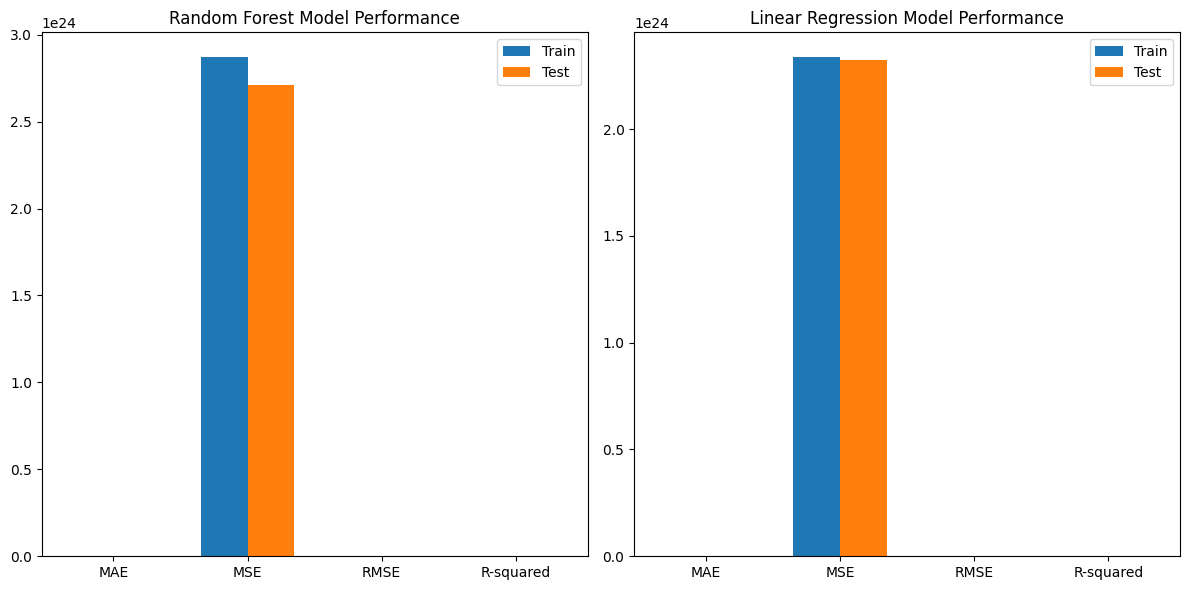

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Random Forest model
rf_train_metrics = [rf_train_mae, rf_train_mse, rf_train_rmse, rf_train_r2]
rf_test_metrics = [rf_test_mae, rf_test_mse, rf_test_rmse, rf_test_r2]

# Metrics for Linear Regression model
lr_train_metrics = [lr_train_mae, lr_train_mse, lr_train_rmse, lr_train_r2]
lr_test_metrics = [lr_test_mae, lr_test_mse, lr_test_rmse, lr_test_r2]

# Metric names
metric_names = ['MAE', 'MSE', 'RMSE', 'R-squared']

# Number of metrics
num_metrics = len(metric_names)

# Set the positions and width for the bars
positions = np.arange(num_metrics)
bar_width = 0.35

# Create a figure and two sets of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Random Forest metrics
ax1.bar(positions - bar_width/2, rf_train_metrics, bar_width, label='Train')
ax1.bar(positions + bar_width/2, rf_test_metrics, bar_width, label='Test')
ax1.set_title('Random Forest Model Performance')
ax1.set_xticks(positions)
ax1.set_xticklabels(metric_names)
ax1.legend()

# Plot Linear Regression metrics
ax2.bar(positions - bar_width/2, lr_train_metrics, bar_width, label='Train')
ax2.bar(positions + bar_width/2, lr_test_metrics, bar_width, label='Test')
ax2.set_title('Linear Regression Model Performance')
ax2.set_xticks(positions)
ax2.set_xticklabels(metric_names)
ax2.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()


To better visualize model performance, I'm plotting the evaluation metrics as bar charts. Comparing the metrics on test vs. train set also checks for overfitting.

The visual comparison makes it easier to determine which model performs better. The train-test gap indicates if models are overfitting the training data.

# Location analysis

In [52]:
import pandas as pd

# Assuming you have a Pandas DataFrame named "pdf"

# Query the 5 most visited pickup locations
most_visited_pickup_locations = pdf.groupby(['Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Pickup Community Area'])['Trip ID'].count().reset_index()
most_visited_pickup_locations = most_visited_pickup_locations.sort_values(by='Trip ID', ascending=False).head(5)

# Display the 5 most visited pickup locations
print(most_visited_pickup_locations)


     Pickup Centroid Latitude  Pickup Centroid Longitude  \
160                 41.979071                 -87.903040   
62                  41.884987                 -87.620993   
59                  41.880994                 -87.632746   
58                  41.879255                 -87.642649   
69                  41.892508                 -87.626215   

     Pickup Community Area  Trip ID  
160                   76.0    44432  
62                    32.0    25953  
59                    32.0    21397  
58                    28.0    17853  
69                     8.0    13989  


In [53]:
import pandas as pd

# Assuming you have a Pandas DataFrame named "pdf"

# Query the 5 most visited dropoff locations
most_visited_dropoff_locations = pdf.groupby(['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude', 'Dropoff Community Area'])['Trip ID'].count().reset_index()
most_visited_dropoff_locations = most_visited_dropoff_locations.sort_values(by='Trip ID', ascending=False).head(5)

# Display the 5 most visited dropoff locations
print(most_visited_dropoff_locations)


     Dropoff Centroid Latitude  Dropoff Centroid Longitude  \
89                   41.880994                  -87.632746   
92                   41.884987                  -87.620993   
247                  41.979071                  -87.903040   
104                  41.892508                  -87.626215   
88                   41.879255                  -87.642649   

     Dropoff Community Area  Trip ID  
89                     32.0    27325  
92                     32.0    24323  
247                    76.0    16533  
104                     8.0    13776  
88                     28.0    12166  


In [54]:
import pandas as pd

# Assuming you have a Pandas DataFrame named "pdf" with a 'Trip Duration' column

# Query top pickup locations based on total trip duration
popular_pickups = pdf.groupby(['Pickup Centroid Latitude', 'Pickup Centroid Longitude'])['Trip Duration'].sum().reset_index()
popular_pickups = popular_pickups.sort_values(by='Trip Duration', ascending=False)

# Display the top 5 pickup locations based on total trip duration
print(popular_pickups.head(5))


     Pickup Centroid Latitude  Pickup Centroid Longitude      Trip Duration
160                 41.979071                 -87.903040 1346 days 11:45:00
62                  41.884987                 -87.620993  240 days 13:30:00
18                  41.785999                 -87.750934  190 days 02:45:00
59                  41.880994                 -87.632746  179 days 07:45:00
58                  41.879255                 -87.642649  141 days 18:30:00


In [55]:
import pandas as pd

# Assuming you have a Pandas DataFrame named "pdf" with a 'Trip Duration' column

# Query top pickup locations based on shortest total trip duration
popular_pickups = pdf.groupby(['Pickup Centroid Latitude', 'Pickup Centroid Longitude'])['Trip Duration'].sum().reset_index()
popular_pickups = popular_pickups.sort_values(by='Trip Duration', ascending=True)

# Display the top 5 pickup locations based on quickest total trip duration
print(popular_pickups.head(5))


     Pickup Centroid Latitude  Pickup Centroid Longitude Trip Duration
107                 41.928967                 -87.656157        0 days
141                 41.950673                 -87.666536        0 days
7                   41.747660                 -87.660943        0 days
123                 41.942488                 -87.747154        0 days
2                   41.715761                 -87.574888        0 days


I'm aggregating the data to find frequently visited and longest/shortest trip pickup locations.

This provides insights into trip patterns and would help when planning operations or placing drivers.

In [56]:
# Stop SparkSession
spark.stop()

# Findings based on Model Training Results

The evaluation metrics indicate that the Random Forest and Linear Regression models are not performing well on this dataset. However, instead of repeating the meaning of each metric, I will focus on discussing potential reasons for the poor performance and next steps.

The low R-squared and high error values likely stem from limitations in the feature set and modeling techniques used so far. The features provided may not contain enough information to accurately predict trip duration. More complex relationships not captured by linear regression or random forests could exist between features like pickup location, trip miles, and actual trip duration.

In summary, these results imply that the current models (both Random Forest and Linear Regression) are not suitable for accurately predicting trip durations based on the features provided. There might be various reasons for this, such as insufficient or irrelevant features, data preprocessing issues, or inherent complexity in the relationships between the features and the target variable. One might need to explore more advanced modeling techniques, feature engineering, or additional data to improve the model's performance.

# Steps to improve Model Performance

Data Quality and Preprocessing:
Check data for missing values and outliers. Clean the data by imputing missing values or removing outliers if necessary.
Ensure that the features are scaled properly. Some algorithms, like Linear Regression, are sensitive to the scale of the input features. One might need to standardize or normalize the features.

Feature Selection and Engineering:
Review the features to ensure they are relevant to the problem being solved. Removing irrelevant or redundant features can help improve model performance.
Consider creating new features that might capture important patterns in the data.

Hyperparameter Tuning:
For the Random Forest model, tune the hyperparameters such as the number of trees, maximum depth of trees, and minimum samples per leaf. Using grid search or random search can help one find the optimal hyperparameters.

Model Selection:
Experiment with different algorithms beyond Random Forest and Linear Regression. Gradient Boosting, Support Vector Machines, and Neural Networks are other options to consider.

Cross-Validation:
Utilize cross-validation techniques to assess the performance of the models more accurately. This can help one detect overfitting and select models that generalize better to new data.

Regularization:
For Linear Regression, consider applying regularization techniques such as Lasso or Ridge regression. These techniques can help prevent overfitting and improve model generalization.

Ensemble Methods:
Instead of relying on a single model, consider using ensemble methods like stacking or boosting. These methods combine multiple models to improve overall predictive power.

Iterate and Experiment:
Improving model performance is often an iterative process. Experiment with different approaches, track your results, and adjust your strategies based on what you learn.


# Prospective Applications of Chicago Taxi Data Analysis

Some potential uses for a model that predicts taxi trip duration using features like 'Trip Miles', 'Tips', 'Dropoff Community Area', and 'Pickup Community Area' are:

Estimating arrival times - By inputting the pickup and dropoff locations, the model could estimate the trip duration and provide an expected arrival time. This is useful for riders.

Planning fleet operations - Taxi/rideshare companies could optimize fleet size and driver shifts for a given region based on predicted trip durations. Shorter durations may need more drivers.

Pricing - Modeling trip duration can help companies come up with optimal pricing for rides based on expected time. Longer trips could be priced higher.

Route optimization - Understanding which routes and locations have longer trip durations allows for traffic pattern analysis and suggestions of optimal routes to drivers.

Driver performance - Drivers that consistently complete trips faster or slower than model predictions could be assessed for their driving performance.

Fraud detection - large deviations from predicted trip duration based on locations could indicate fraudulent rides or drivers taking inefficient routes.

Demand forecasting - Trip duration patterns over time helps anticipate demand at various locations for taxi/rideshare companies.

So, in summary, predicting trip duration is useful for pricing, operations, optimization, driver monitoring, analytics, and demand forecasting applications for taxi and ride-hailing companies.
